In [ ]:
import numpy as np
import math


def exp_fun(average, x):
    return 1 - pow(np.exp(1), -(average * x))

def dis_fun(alpha, sigma, x):
    return (1 / 2) * (1 + math.erf((x - alpha) / (np.sqrt(sigma) * np.sqrt(2))))

# Сhi squared table

In [ ]:
# k - Число степеней свободы
# Рівня значимости a = 0.05
hi_squared_table = {
    1: 3.8,
    2: 6.0,
    3: 7.8,
    4: 9.5,
    5: 11.1,
    6: 12.6,
    7: 14.1,
    8: 15.5,
    9: 16.9,
    10: 18.3,
    11: 19.7,
    12: 21.0,
    13: 22.4,
    14: 23.7,
    15: 25.0,
    16: 26.3,
    17: 27.6,
    18: 28.9,
    19: 30.1,
    20: 31.4,
    21: 32.7,
    22: 33.9,
    23: 35.2,
    24: 36.4,
    25: 37.7,
    26: 38.9,
    27: 40.1,
    28: 41.3,
    29: 42.6,
    30: 43.8
}


def find_table_hi_squared(x):
    return hi_squared_table[x]

# Utils

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import cprint


def print_name(num):
    cprint('\n\t___GENERATOR #' + str(num) + '___', 'cyan', attrs=['bold'])


def print_extra_info(average, dispersion, observed_chi_2, expected_chi_2, result):
    print('\naverage: ' + str(average)+ ' dispersion: ' + str(dispersion))
    print('X squared (практичний): ' + str(observed_chi_2))


def get_average_and_dispersion(array):
    s = 0
    average = array.sum() / array.size

    for i in array:
        s += pow(i - average, 2)

    dispersion = s / (array.size - 1)
    return average, dispersion

def get_intervals(array, num_of_intervals):
    updated_num_of_intervals = num_of_intervals

    interval_size = (array.max() - array.min()) / updated_num_of_intervals

    entries_list = list()
    limit_1 = array.min()

    for i in range(0, num_of_intervals):
        limit_2 = limit_1 + interval_size

        counter = 0
        for n in array:
            if limit_1 <= n < limit_2:
                counter += 1

        # Check if the interval has fewer than 5 elements
        if counter < 5 and i < num_of_intervals - 1:
            # Merge
            limit_2 += interval_size  # Expand the limit to include the next interval
            counter += len([n for n in array if limit_1 <= n < limit_2])  # Update the counter
            num_of_intervals -= 1  # Reduce the total number of intervals

        # Add the current interval to the list
        entries_list.append([[limit_1, limit_2], counter])

        limit_1 = limit_2

    return entries_list, updated_num_of_intervals

def pull_intervals_from_list(entries, num_of_intervals):
    interval_list = list()
    for i in range(num_of_intervals):
        interval_list.append([entries[i][0][0], entries[i][0][1]])
    return interval_list


def to_data_frame(arr, num_of_intervals):
    copy_arr = [x[:] for x in arr]

    for i in range(num_of_intervals):
        name_interval = str(round(copy_arr[i][0][0], 2)) + '-' + str(round(copy_arr[i][0][1], 2))
        copy_arr[i][0] = name_interval

    df = pd.DataFrame(copy_arr, columns=['Intervals', 'Values'])
    return df


def plot_histogram(entries_list, num_of_intervals):
    df_e = to_data_frame(entries_list, num_of_intervals)
    # print(df_e.head(num_of_intervals))
    sns.barplot(data=df_e, x='Intervals', y='Values')
    plt.xticks(rotation=45)
    plt.show()


def get_chi_squared(expected_list, observed_list, num_of_intervals):
    chi_2 = 0
    for i in range(num_of_intervals):
        expected = 10000 * expected_list[i]
        chi_2 += pow(observed_list[i] - expected, 2) / expected
    return chi_2


def chi_2_tool(expected_list, observed_list, num_of_intervals):
    observed_chi_squared = get_chi_squared(expected_list, observed_list, num_of_intervals)
    expected_chi_squared = find_table_hi_squared(num_of_intervals - 1)
    return observed_chi_squared, expected_chi_squared

# Method 1
Exponential

In [ ]:
import random
import numpy as np


class Random1:
    def __init__(self, lyambda, num_of_values):
        self.lyambda = lyambda
        self.num_of_values = num_of_values

    def create_array(self):
        x_array = np.array([])
        for i in range(0, self.num_of_values):
            ksi = random.random()
            x_array = np.append(x_array, -np.log(ksi) / self.lyambda)
        self.average = np.average(x_array)
        return x_array

    def get_expected_values(self, entries, num_of_intervals):
        expected_list = list()

        interval_list = pull_intervals_from_list(entries, num_of_intervals)

        for i in range(num_of_intervals):
            expected_list.append(self.calculate_exponential(interval_list, i))
        return expected_list

    def calculate_exponential(self, interval_list, i):
        if interval_list[i][1] > interval_list[i][0]:
            return exp_fun(self.lyambda, interval_list[i][1]) - exp_fun(self.lyambda, interval_list[i][0])
        else:
            return exp_fun(self.lyambda, interval_list[i][0]) - exp_fun(self.lyambda, interval_list[i][1])

    def analyze(self, num_of_intervals):
        print_name(1)

        array = self.create_array()
        average, dispersion = get_average_and_dispersion(array)

        entries, updated_num_of_intervals = get_intervals(array, num_of_intervals)  #
        plot_histogram(entries, updated_num_of_intervals)

        expected_list = self.get_expected_values(entries, num_of_intervals)
        observed_list = [i[1] for i in entries]

        observed_chi_squared, expected_chi_squared = chi_2_tool(expected_list, observed_list, num_of_intervals)

        print_extra_info(average, dispersion, observed_chi_squared, expected_chi_squared,
                              observed_chi_squared < expected_chi_squared)


	___GENERATOR #1___


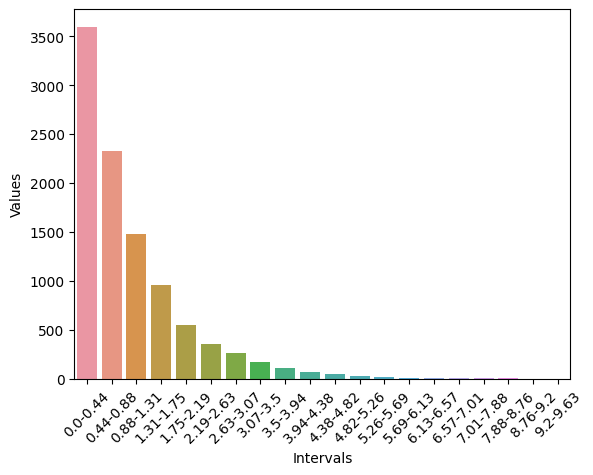


average: 0.9827901497617897 dispersion: 0.9788584381198852
X squared (практичний): 24.339197424709262


In [ ]:
generator_1 = Random1(1, 10000)
generator_1.analyze(20)

# Method 2

In [ ]:
import random
import numpy as np

def get_myu():
    myu = 0
    for i in range(0, 12):
        myu += random.uniform(0,1)
    return myu - 6


class Random2:
    def __init__(self, alpha, sigma, num_of_values):
        self.alpha = alpha
        self.sigma = sigma
        self.num_of_values = num_of_values

    def create_array(self):
        x_array = np.array([])
        for i in range(0, self.num_of_values):
            myu = get_myu()
            x_array = np.append(x_array, self.sigma * myu + self.alpha)
        return x_array

    def get_expected_values(self, dispersion, entries, num_of_intervals):
        expected_list = list()
        interval_list = pull_intervals_from_list(entries, num_of_intervals)

        for i in range(num_of_intervals):
            expected_list.append(self.calculate_normal(dispersion, interval_list, i))
        return expected_list

    def calculate_normal(self, dispersion, interval_list, i):
        x = (interval_list[i][1] + interval_list[i][0]) / 2
        num = dis_fun(self.alpha, self.sigma, x)
        if num > 0.5:
            return 1 - num
        else:
            return num

    def analyze(self, num_of_intervals):
        print_name(2)

        array = self.create_array()
        average, dispersion = get_average_and_dispersion(array)

        entries = get_intervals(array, num_of_intervals)  #
        plot_histogram(entries, num_of_intervals)

        observed_list = [i[1] for i in entries]

        expected_list = self.get_expected_values(dispersion, entries, num_of_intervals)

        observed_chi_squared, expected_chi_squared = chi_2_tool(expected_list, observed_list, num_of_intervals)

        print_extra_info(average, dispersion, observed_chi_squared, expected_chi_squared,
                              observed_chi_squared < expected_chi_squared)



In [ ]:
generator_2 = Random2(2, 3/2, 10000)
generator_2.analyze(20)

# Method 3

In [ ]:
import random
import numpy as np


class Random3:
    def __init__(self, num_of_values):
        self.a = pow(5, 12)
        self.c = pow(2, 10)
        self.num_of_values = num_of_values

    def create_array(self):
        z = self.a * random.random() % self.c
        x_array = np.array([])
        for i in range(0, self.num_of_values):
            z = self.a * z % self.c
            x_array = np.append(x_array, z / self.c)

        return x_array

    def get_expected_values(self, array, entries, num_of_intervals):
        expected_list = list()

        interval_list = pull_intervals_from_list(entries, num_of_intervals)

        for i in range(num_of_intervals):
            expected_list.append(self.calculate(array, interval_list, i))
        return expected_list

    def calculate(self, array, interval_list, i):
        return (interval_list[i][1] - interval_list[i][0]) / (max(array) - min(array))

    def analyze(self, num_of_intervals):
        print_name(3)

        array = self.create_array()
        average, dispersion = get_average_and_dispersion(array)

        entries, updated_num_of_intervals = get_intervals(array, num_of_intervals)
        plot_histogram(entries, updated_num_of_intervals)

        expected_list = self.get_expected_values(array, entries, num_of_intervals)
        observed_list = [i[1] for i in entries]

        observed_chi_squared, expected_chi_squared = chi_2_tool(expected_list, observed_list, num_of_intervals)

        print_extra_info(average, dispersion, observed_chi_squared, expected_chi_squared,
                              observed_chi_squared < expected_chi_squared)


	___GENERATOR #3___


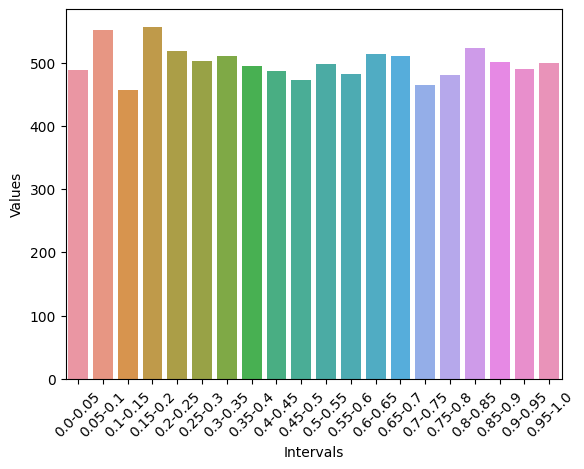


average: 0.4968506251335144 dispersion: 0.08397059408004762
X squared (практичний): 24.232000000000102


In [ ]:
generator_3 = Random3(10000)
generator_3.analyze(20)